In [ ]:
### Rewrite the MP distribtuion as a function

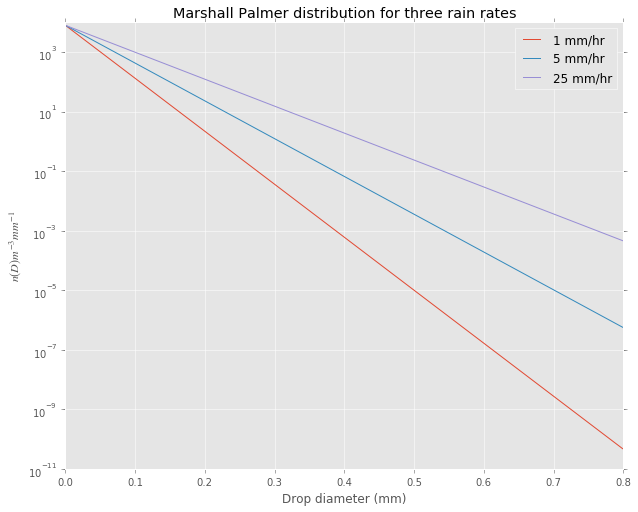

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def marshallpalmer(R):
    """
    marshall palmer size distribution
    given rainrate R in mm/hr, return
    n(D), the number concentration of drops with
    diameter D

    Parameters
    ----------
    R: float
        rainrate (mm/hr)

    Returns
    -------

    d: vector (float)
      drop diameters (cm)

    n: vector (float)
     the number distribution n(d) #m^{-3} mm^{-1}

    """
    D=np.arange(0,8,0.01)
    Dmm=D
    Dcm=D*0.1
    N0=0.08*1.e6*1.e-1 #m**{-3} mm^{-1}
    theLambda=41*R**(-0.21)
    n=N0*np.exp(-theLambda*Dcm)
    return Dcm,n

curve_dict={}
Rvals = [1,5,25]
for R in Rvals:
    diam,ndist = marshallpalmer(R)
    curve_dict[R] = ndist
fig, ax = plt.subplots(1,1,figsize=(10,8))
for R in Rvals:
    ax.semilogy(diam,curve_dict[R],label='{} mm/hr'.format(R))
ax.set_xlabel('Drop diameter (mm)')
ax.set_ylabel('$n(D) m^{-3} mm^{-1}$')
ax.set_title('Marshall Palmer distribution for three rain rates')
out=ax.legend(loc='best')

### Get the integrated precipitation flux for R=15 mm/hour

Try this with two different fall speeds -- Thompkins p. 77 and the Nature article

In [6]:
def find_uthompkins(diams):
    """
    Thompkins p. 77 table
    
    Parameters
    ----------
    
    diams: vector of floats
         drop diamter (meters)
         
    Returns
    -------
    
    vel_vec: vector of floats
           fall speed (m/s) 
    """
    diams = np.atleast_1d(diams)
    rvals = diams/2.
    #diam in meters, thompkins p. 77
    vel_list=[]
    #
    #  
    #
    edges = np.array([0,30,1000,8000])*1.e-6  #meters
    bins = np.searchsorted(edges,rvals)
    for r, bin in zip(rvals,bins):
        if bin == 1:
            vel = 1.2e8*r**2.
        elif bin == 2:
            vel = 6.e3*r  #Thompkins says 8000?
        elif bin == 3:
            vel = 250*0.75*np.sqrt(r)  #0.75 fudge factor to get curve match
        else:
            if r==0:
                vel=0.
            else:
                raise ValueError('droplet size out of bounds')
        vel_list.append(vel)
    return np.array(vel_list)
    
#find the rain rate for a dropsize distribution
#specified by a marshall-palmer distribution of 15 mm/hour
import numpy as np
g=9.8  #m/s^2
rho=1  #kg/m^3 air density
rhol=1000. #kg/m^3 liquid water density
R=15 #mm/hr
diam,ndist = marshallpalmer(R)
diam = diam*1.e-2 #meters
Unature=np.sqrt(rhol/rho*g*diam) #m/s  Villermaux and Bossa, 2009
Uthompkins = find_uthompkins(diam) #thompkins
U=Unature
binwidth = np.diff(diam)[0]*1.e3 #mm
R=np.sum(ndist*np.pi*(diam**3)/6*U*binwidth) #flux in m/s
R=R*1000*3600. #mm/hour
out_mesg='\nfor R=15 mm/hour integration gives {:8.2f} mm/hour\n'
print(out_mesg.format(R))


for R=15 mm/hour integration gives    12.40 mm/hour



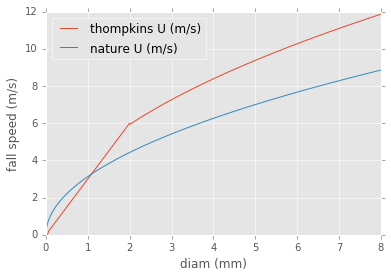

In [7]:
fig,ax = plt.subplots(1,1)
ax.plot(diam*1.e3,Uthompkins,label='thompkins U (m/s)')
ax.plot(diam*1.e3,Unature,label='nature U (m/s)')
ax.legend(loc='best')
out=ax.set(xlabel='diam (mm)',ylabel='fall speed (m/s)')

### Find the mean diameter and show that it is close to 1/Lambda, as expected

In [8]:
R = 15 #mm/hr
theLambda=41*R**(-0.21)
print('mean diameter = {:6.3g} cm'.format(1./theLambda))
diam,ndist = marshallpalmer(R)  #cm, m^{-3} mm^{-1}
binwidth = np.diff(diam)[0]*10  #bin width in mm
approx_diam = np.sum(diam*ndist*binwidth)/np.sum(ndist*binwidth)
print('approx diameter = {:6.3g} cm'.format(approx_diam))

mean diameter = 0.0431 cm
approx diameter = 0.0426 cm
